<a href="https://colab.research.google.com/github/jpafcampos/Fundamentos-de-IA/blob/main/EstudoDirigido3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pgmpy==0.1.11
#!pip install bnlearn

  Using cached pgmpy-0.1.11-py3-none-any.whl.metadata (6.1 kB)
Using cached pgmpy-0.1.11-py3-none-any.whl (314 kB)
  Attempting uninstall: pgmpy
    Found existing installation: pgmpy 0.1.25
    Uninstalling pgmpy-0.1.25:
      Successfully uninstalled pgmpy-0.1.25
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlearn 0.11.1 requires pgmpy==0.1.25, but you have pgmpy 0.1.11 which is incompatible.
  Using cached pgmpy-0.1.25-py3-none-any.whl.metadata (6.4 kB)
Using cached pgmpy-0.1.25-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pgmpy
    Found existing installation: pgmpy 0.1.11
    Uninstalling pgmpy-0.1.11:
      Successfully uninstalled pgmpy-0.1.11


In [ ]:
import pandas as pd
import bnlearn as bn

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving data_printer_english.csv to data_printer_english.csv


In [ ]:
data = pd.read_csv('data_printer_english.csv', sep=';')

In [ ]:
data.head()

,ink,question_ink,paper,question_paper,driver,question_screen,action_addink,action_addpaper,action_reboot
0,0,1,1,1,1,1,0,1,1
1,0,1,1,1,1,1,0,1,1
2,0,0,1,1,1,0,0,1,1
3,1,1,0,0,1,1,1,0,1
4,1,1,0,1,1,1,1,0,1


In [ ]:
data.columns

Index(['ink', 'question_ink', 'paper', 'question_paper', 'driver',
       'question_screen', 'action_addink', 'action_addpaper', 'action_reboot'],
      dtype='object')

Vamos estudar um problema de manutenção de impressora, com os dados que carregamos.
Supomos que a impressora pode apresentar 3 tipos de falha:
1. Problema de Tinta
2. Problema de Papel
3. Problema de Driver

Há três perguntas que você pode fazer:
1. A impressora está com tinta?
2. A impressora está com papel?
3. A tela apresenta uma mensagem de erro? (question_screen)

Além disso, você tem direito a três ações:
1. Colocar mais tinta
2. Colocar o papel
3. Reiniciar (reboot)

Vamos modelar esse problema usando uma rede Bayesiana. Neste primeiro momento, você deverá sugerir uma estrutura para a rede, conectando as variáveis de forma que faça sentido.

Para esse problema, podemos construir uma rede bayesiana causal que modele o processo lógico de diagnóstico e ação sobre as falhas de uma impressora. A rede deve refletir:

As causas latentes dos problemas (variáveis de estado como ink, paper, driver)

As evidências observáveis (as respostas às perguntas question_ink, question_paper, question_screen)

As ações corretivas tomadas (action_addink, action_addpaper, action_reboot)

In [ ]:
edges = [('papier', 'question_paper'),
         ('ink', 'question_ink'),
         ('papier', 'question_screen'),
         ] # COMPLETE COM MAIS ARESTAS QUE FAÇAM SENTIDO
DAG = bn.make_DAG(edges)

[bnlearn]> Auto generate placeholders for the CPTs.
[bnlearn] >CPT for question_paper:
+-------------------+-----------+-----------+
| papier            | papier(0) | papier(1) |
+-------------------+-----------+-----------+
| question_paper(0) | 0.5       | 0.5       |
+-------------------+-----------+-----------+
| question_paper(1) | 0.5       | 0.5       |
+-------------------+-----------+-----------+
[bnlearn] >CPT for question_ink:
+-----------------+--------+--------+
| ink             | ink(0) | ink(1) |
+-----------------+--------+--------+
| question_ink(0) | 0.5    | 0.5    |
+-----------------+--------+--------+
| question_ink(1) | 0.5    | 0.5    |
+-----------------+--------+--------+
[bnlearn] >CPT for question_screen:
+--------------------+-----------+-----------+
| papier             | papier(0) | papier(1) |
+--------------------+-----------+-----------+
| question_screen(0) | 0.5       | 0.5       |
+--------------------+-----------+-----------+
| question_screen(1) 

Visualize sua estrutura:

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


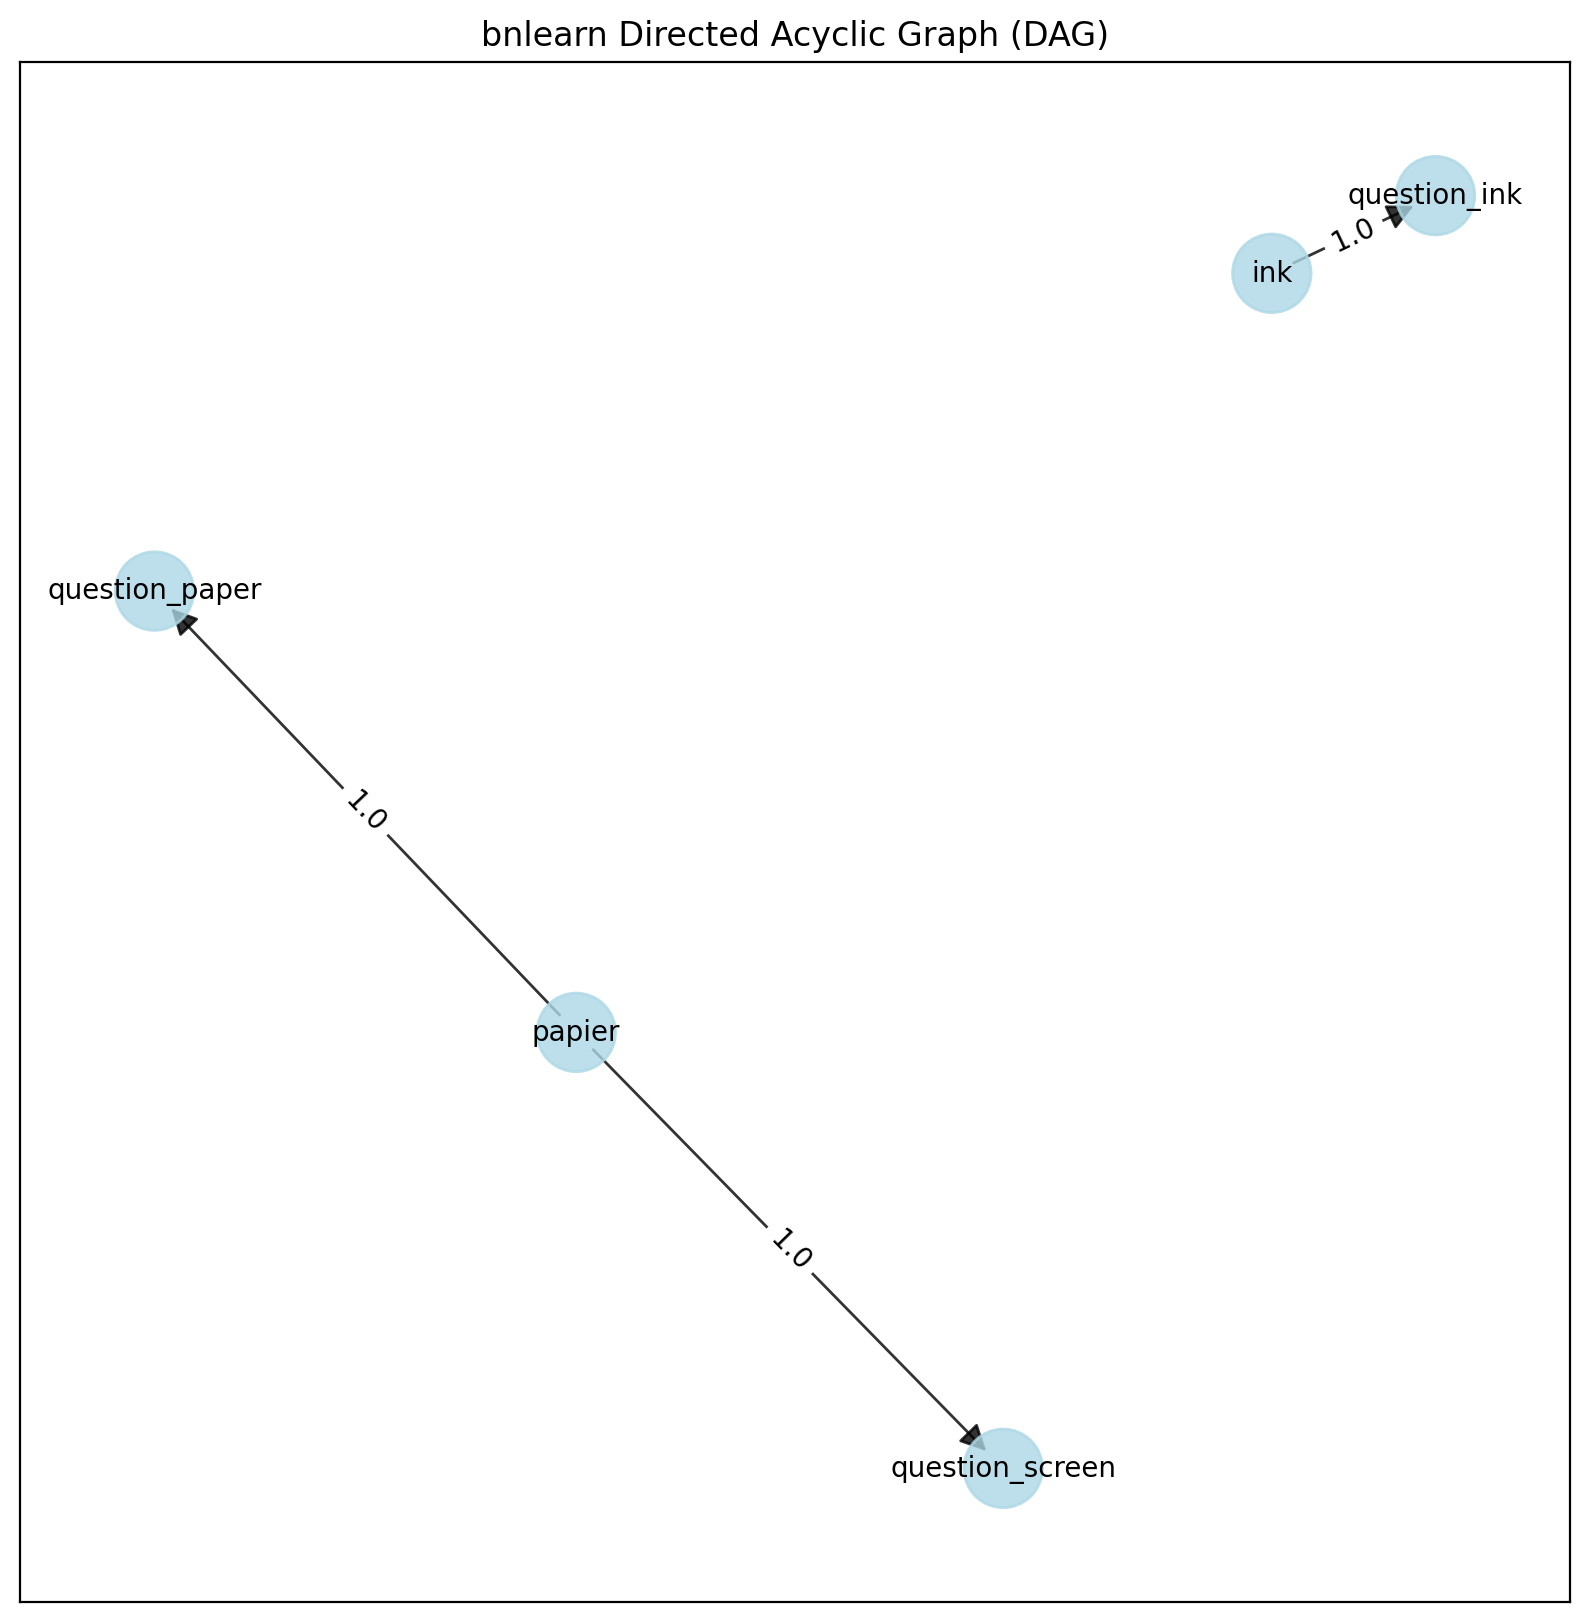

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'papier': array([-0.42522607, -0.36460786]),
  'question_paper': array([-1.        ,  0.13786181]),
  'question_screen': array([ 0.15662949, -0.86100155]),
  'ink': array([0.52276789, 0.49965358]),
  'question_ink': array([0.74582869, 0.58809402])},
 'G': <networkx.classes.digraph.DiGraph at 0x7af350d141d0>,
 'node_properties': {'papier': {'node_color': '#ADD8E6', 'node_size': 800},
  'question_paper': {'node_color': '#ADD8E6', 'node_size': 800},
  'ink': {'node_color': '#ADD8E6', 'node_size': 800},
  'question_ink': {'node_color': '#ADD8E6', 'node_size': 800},
  'question_screen': {'node_color': '#ADD8E6', 'node_size': 800}},
 'edge_properties': {('papier', 'question_paper'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('papier', 'question_screen'): {'color': '#000000',
   'weight': 1.0,
   'pvalue': 1,
   'value': 1.0},
  ('ink', 'question_ink'): {'color': 

In [ ]:
bn.plot(DAG)

IMPORTANTE! As variáveis no nosso dataframe devem ser interpretadas assim:
*   ink, paper, drive = 0 --> falha
*   action_ = 0 --> sucesso da ação
*   question_ink = 0 --> sem tinta
*   question_paper = 0 --> sem papel
*   question_screen = 0 --> mensagem de erro

Na estrutura que você propôs, quais independências condicionais você identifica? Elas fazem sentido?

Uma vez feita a estrutura, vamos agora aprender os parâmetros dela: as distribuições de probabilidade condicionais. Pesquise como fazer isso usando as funções da biblioteca bnlearn.

In [ ]:
# código aqui

Com o modelo aprendido, calcule as probabilidades marginais:
1. Probabilidade de problema de tinta P(ink)?
2. de papel?
3. de driver?

In [ ]:
# código aqui

Agora, calcule as probabilidades condicionais abaixo, usando o parâmetro 'evidence' da função de inferência da biblioteca bnlearn.
1. Probabilidade de problema de tinta, sabendo que há papel?
2. Sabendo que há uma mensagem de erro, qual a prob de problema de driver?
3. Qual probabilidade de sucesso via reboot, dado que há papel?
4. Qual a melhor ação a ser tomada, sabendo que há papel e a tela mostra uma mensagem de erro?

In [ ]:
# códigos aqui

Agora, pesquise como aprender uma nova estrutura utilizando o algoritmo Hill Climbing. Ele está incluso na biblioteca bnlearn, e pode ser chamado com 1 linha de código. Em seguida, visualize a estrutura aprendida e compare com aquela proposta por você. Indique se há independências condicionais diferentes (d-separações), e se elas capturam relações muito distintas ou se são semelhantes.

In [ ]:
# código aqui

Explique de maneira sucinta como funciona o método Hill Climbing.

# EXTRA (PARTE OPCIONAL)

Essa parte do estudo dirigido é opcional, valendo 1 ponto extra, e pensada para aqueles e aquelas que desejarem aprofundar no conhecimento de redes Bayesianas e machine learning. Aqui, nosso objetivo será usar as redes aprendidas como um modelo de Machine Learning de classificação.

Vamos supor que nossa variável alvo seja a variável 'ink', que relata se há falha relacionada à tinta da impressora. Seu trabalho será:

1. Dividir os dados em um conjunto de treino e teste (idealmente, fazendo
validação cruzada)
2. No conjunto de treino, você aprende a estrutura e os parâmetros da rede Bayesiana.
3. No conjunto de teste, você realiza inferência sobre a variável alvo, usando as outras como evidência (evidence).
4. Para medir o desempenho do modelo, compare a saída da inferência com o valor real. Trata-se de um problema de classificação binária, em que você pode usar as métricas precision, recall, etc.
5. Discuta os resultados.